In [1]:
#import modules and file, and read 10 row's from file
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
df=pd.read_csv("M&M.csv")
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-10,970.650024,976.150024,934.599976,937.349976,882.473755,2151834
1,2018-09-11,943.000000,961.000000,936.299988,943.150024,887.934326,3909701
2,2018-09-12,948.450012,951.000000,912.400024,938.150024,883.226990,2787531
3,2018-09-14,941.200012,954.799988,928.049988,951.900024,896.171936,2803861
4,2018-09-17,947.650024,956.400024,936.599976,950.849976,895.183350,1978897
5,2018-09-18,949.450012,961.000000,940.400024,946.549988,891.135254,2227889
6,2018-09-19,947.000000,965.650024,938.200012,948.900024,893.347595,2083160
7,2018-09-21,963.000000,976.700012,870.000000,959.900024,903.703735,4633394
8,2018-09-24,955.000000,958.200012,885.000000,896.049988,843.591675,4569708
9,2018-09-25,896.000000,900.000000,865.250000,893.000000,840.720276,4269089


In [2]:
#dataframe creation

seriesdata = df.sort_index(ascending = True, axis = 0)
new_seriesdata = pd.DataFrame(index=range(0,len(df)),columns=['Date','Close'])

length_of_data=len(seriesdata)
for i in range(0, length_of_data):
    new_seriesdata['Date'][i] = seriesdata['Date'][i]
    new_seriesdata['Close'][i] = seriesdata['Close'][i]

#setting the index 

new_seriesdata.index = new_seriesdata.Date
new_seriesdata.drop('Date', axis=1, inplace=True)

#training & testing spliting

training_set=new_seriesdata.values
training=df.iloc[:800,1:2].values
testing=df.iloc[800:,1:2].values

#scaling the data 


sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(training_set)

In [3]:
x_train = []
y_train = []
for iter in range(60, 800):
    x_train.append(training_scaled[iter-60:iter,0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [4]:
#LSTM Model with 50 neurons & 4 hidden layers
algo = Sequential()
algo.add(LSTM(units = 50, return_sequences = True, input_shape = (x_train.shape[1], 1)))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50, return_sequences = True))
algo.add(Dropout(0.2))
algo.add(LSTM(units = 50))
algo.add(Dropout(0.2))
algo.add(Dense(units = 1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
algo.fit(x_train, y_train, epochs = 100, batch_size = 32)


Epoch 1/100
24/24 [==============================] - 12s 83ms/step - loss: 0.0178
Epoch 2/100
24/24 [==============================] - 2s 75ms/step - loss: 0.0038
Epoch 3/100
24/24 [==============================] - 2s 82ms/step - loss: 0.0026
Epoch 4/100
24/24 [==============================] - 2s 79ms/step - loss: 0.0027
Epoch 5/100
24/24 [==============================] - 2s 73ms/step - loss: 0.0023
Epoch 6/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0021
Epoch 7/100
24/24 [==============================] - 2s 74ms/step - loss: 0.0020
Epoch 8/100
24/24 [==============================] - 2s 78ms/step - loss: 0.0022
Epoch 9/100
24/24 [==============================] - 2s 75ms/step - loss: 0.0022
Epoch 10/100
24/24 [==============================] - 2s 76ms/step - loss: 0.0019
Epoch 11/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0020
Epoch 12/100
24/24 [==============================] - 2s 72ms/step - loss: 0.0020
Epoch 13/100
24/24 [====

In [5]:
#prediction

data_train = df.iloc[:800, 1:2]
data_test = df.iloc[800:, 1:2]
data_total = pd.concat((data_train, data_test), axis = 0)

total_input = data_total[len(data_total) - len(data_test) - 60:].values
total_input = total_input.reshape(-1,1)
total_input =sc.transform(total_input)

x_test = []
for i in range(60, total_input.shape[0]):
    x_test.append(total_input[i-60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
print(x_test.shape)

predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

(435, 60, 1)
14/14 [==============================] - 2s 24ms/step


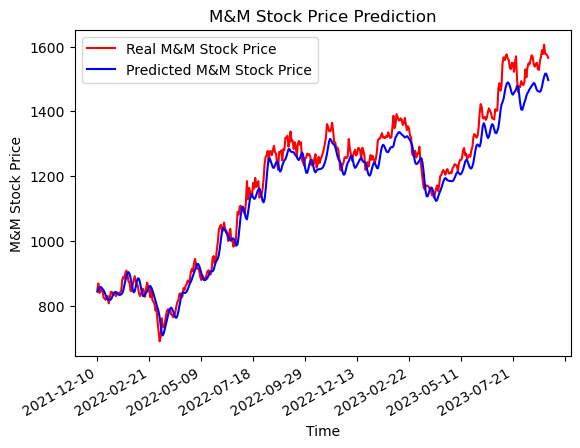

In [6]:
plt.plot(df.loc[800:, 'Date'],data_test.values, color = 'red', label = 'Real M&M Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_price, color = 'blue', label = 'Predicted M&M Stock Price')
plt.gcf().autofmt_xdate()
plt.xticks(np.arange(0,459,50))
plt.title('M&M Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('M&M Stock Price')
plt.legend()
plt.show()